In [1]:
import pandas as pd
df = pd.read_csv('phone_usage_india.csv')
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [2]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [3]:
df.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [3]:
print(df.columns.tolist())

['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS', 'Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)', 'Number of Apps Installed', 'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)', 'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)', 'Primary Use']


In [4]:

df['Phone Brand'] = df['Phone Brand'].str.strip().str.title()

In [5]:
import numpy as np
df['OS'] = np.where(df['Phone Brand'] == 'Apple', 'iOS', 'Android')


In [6]:
df.drop(['User ID'], axis=1, inplace=True)

In [7]:
df

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,60,Other,Delhi,Realme,Android,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,16,Male,Mumbai,Xiaomi,Android,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,27,Other,Mumbai,Apple,iOS,7.2,36.6,90.4,81,5.1,4007,3.8,3.3,1380,Entertainment
17682,40,Female,Chennai,Oppo,Android,9.5,12.9,243.0,166,4.3,8550,3.4,0.7,222,Education
17683,34,Female,Ahmedabad,Realme,Android,1.1,48.9,74.7,70,5.3,5516,0.7,4.0,1612,Entertainment
17684,22,Male,Hyderabad,Vivo,Android,8.8,25.6,105.6,96,2.4,3614,6.6,0.8,1528,Work


In [8]:
import matplotlib.pyplot as plt 

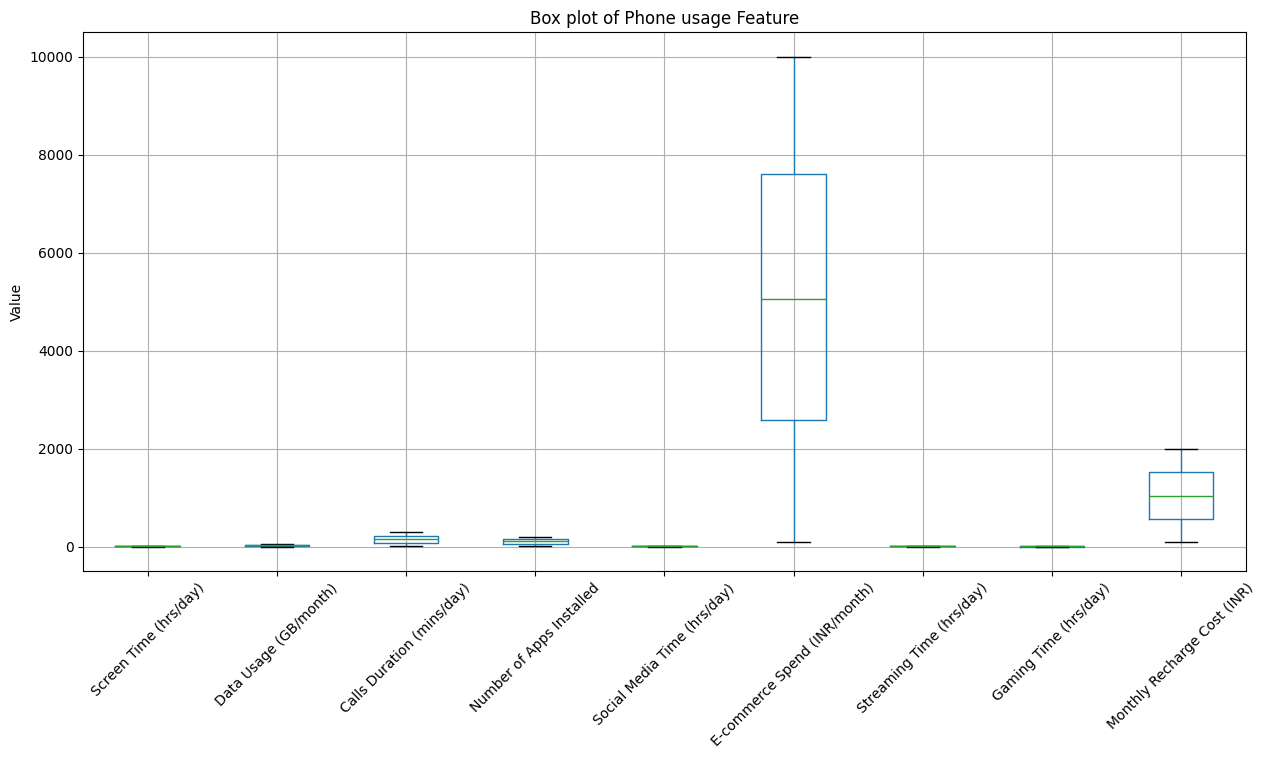

In [9]:
# checking outliers
import matplotlib.pyplot as plt 
num_cols = [
    'Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)',
    'Number of Apps Installed', 'Social Media Time (hrs/day)',
    'E-commerce Spend (INR/month)', 'Streaming Time (hrs/day)',
    'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)'
]
df[num_cols].boxplot(figsize=(15, 7), rot=45)
plt.title('Box plot of Phone usage Feature')
plt.ylabel('Value')
plt.show()

In [10]:
# Most common phone brands and OS in the dataset
df['Phone Brand'].value_counts(), df['OS'].value_counts()

(Phone Brand
 Nokia           1816
 Oneplus         1807
 Xiaomi          1803
 Vivo            1797
 Apple           1775
 Samsung         1764
 Realme          1762
 Google Pixel    1729
 Motorola        1717
 Oppo            1716
 Name: count, dtype: int64,
 OS
 Android    15911
 iOS         1775
 Name: count, dtype: int64)

In [11]:
# percentage of users are from each location
df['Location'].value_counts(normalize=True) * 100

Location
Jaipur       10.313242
Pune         10.262354
Chennai      10.121000
Kolkata      10.115345
Bangalore    10.098383
Ahmedabad    10.092729
Delhi        10.036187
Mumbai        9.736515
Lucknow       9.612123
Hyderabad     9.612123
Name: proportion, dtype: float64

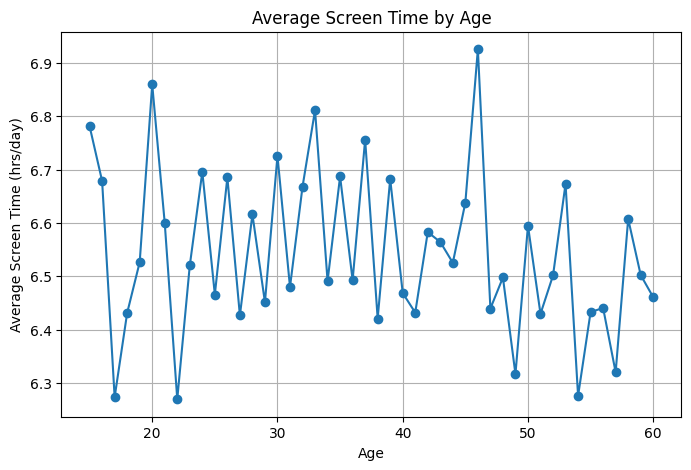

In [12]:
# Screen time vary across different age groups
age_means = df.groupby('Age')['Screen Time (hrs/day)'].mean()
plt.figure(figsize=(8,5))
plt.plot(age_means.index, age_means.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hrs/day)')
plt.title('Average Screen Time by Age')
plt.grid(True)
plt.show()


In [13]:
# How Man and Women use smartphones differently in terms of data usage 
df.groupby('Gender')['Data Usage (GB/month)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,5969.0,25.447026,14.199723,1.0,13.0,25.4,37.6,50.0
Male,5825.0,25.353236,14.060777,1.0,13.4,25.2,37.3,50.0
Other,5892.0,25.432383,14.106152,1.0,13.2,25.4,37.7,50.0


In [14]:
avg_screen_time = df.groupby('Primary Use')['Screen Time (hrs/day)'].mean().sort_values(ascending=False)
print(avg_screen_time)


Primary Use
Entertainment    6.595653
Gaming           6.568205
Work             6.536238
Education        6.530741
Social Media     6.501885
Name: Screen Time (hrs/day), dtype: float64


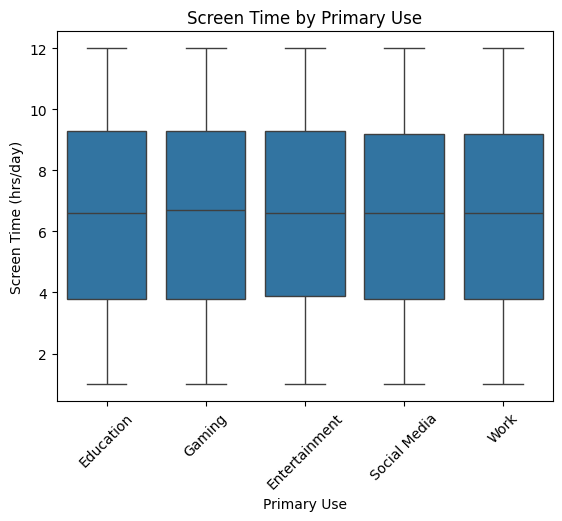

In [15]:
# Patterns in screen time based on primary use 
import seaborn as sns
sns.boxplot(x='Primary Use', y='Screen Time (hrs/day)', data=df)
plt.title('Screen Time by Primary Use')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Apps do people have installed on average per brand

df.groupby('Phone Brand') ['Number of Apps Installed'].mean().sort_values()

Phone Brand
Oppo            103.249417
Oneplus         103.399557
Nokia           103.432269
Motorola        104.065230
Apple           104.632676
Xiaomi          104.641708
Google Pixel    104.715442
Samsung         105.127551
Vivo            105.815248
Realme          106.762770
Name: Number of Apps Installed, dtype: float64

In [17]:
# If data usage correlated with social media or streaming time

df[['Data Usage (GB/month)', 'Social Media Time (hrs/day)', 'Streaming Time (hrs/day)']].corr()


,Data Usage (GB/month),Social Media Time (hrs/day),Streaming Time (hrs/day)
Data Usage (GB/month),1.000000,0.006177,0.004230
Social Media Time (hrs/day),0.006177,1.000000,-0.003571
Streaming Time (hrs/day),0.004230,-0.003571,1.000000


In [18]:
# Age groups spends the most on e-commerce

df.groupby('Age')['E-commerce Spend (INR/month)'].mean().sort_values(ascending=False)

Age
42    5392.064607
27    5319.991781
54    5306.796690
56    5297.402597
39    5233.669312
57    5219.038760
37    5216.448549
28    5209.163728
44    5206.160000
33    5203.572193
22    5194.208955
48    5182.507653
40    5181.516209
60    5181.047354
53    5174.560000
25    5126.275325
55    5115.442971
43    5113.259366
49    5108.182540
59    5092.207692
50    5091.977887
47    5091.007444
32    5088.656676
29    5084.389041
24    5074.068182
17    5056.157609
23    5055.909574
45    5050.592896
30    5040.725389
16    5024.527500
15    5016.542929
31    5015.589333
20    5015.208108
26    5013.916442
34    5003.648000
35    4998.953846
46    4941.651220
18    4940.044568
41    4911.392308
19    4911.071770
58    4888.566210
36    4871.279805
52    4869.090680
38    4865.387640
21    4829.384021
51    4722.906005
Name: E-commerce Spend (INR/month), dtype: float64

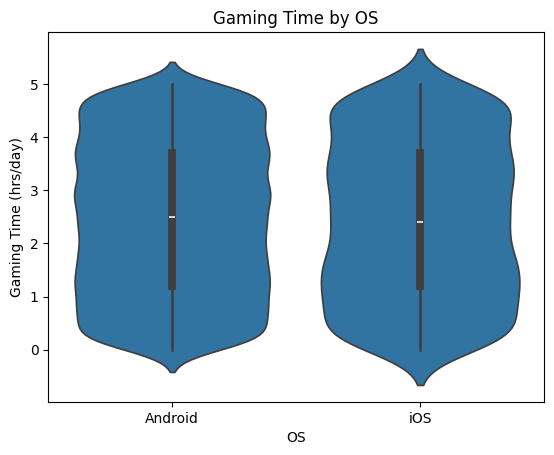

In [19]:
# Gaming time by OS

sns.violinplot(x='OS', y='Gaming Time (hrs/day)', data=df)
plt.title('Gaming Time by OS')
plt.show()

In [20]:
# Primary Group has the highest average data usage 

avg_data_usage = df.groupby('Primary Use')['Data Usage (GB/month)'].mean().sort_values(ascending=False)
print(avg_data_usage)


Primary Use
Entertainment    25.583918
Social Media     25.410226
Education        25.375312
Work             25.363227
Gaming           25.329614
Name: Data Usage (GB/month), dtype: float64


In [21]:
# Location has the highest average data usage 

df.groupby('Location')['Data Usage (GB/month)'].mean().sort_values(ascending=False)

Location
Ahmedabad    26.277423
Delhi        25.787606
Jaipur       25.540954
Lucknow      25.534294
Hyderabad    25.385647
Pune         25.351680
Mumbai       25.340825
Kolkata      25.205254
Bangalore    24.986282
Chennai      24.707709
Name: Data Usage (GB/month), dtype: float64

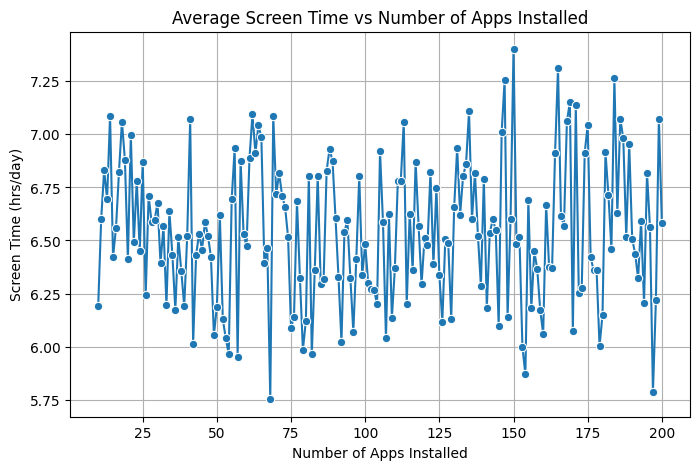

In [22]:
# Calculate mean screen time for each unique number of apps installed
apps_vs_screen = df.groupby('Number of Apps Installed')['Screen Time (hrs/day)'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Number of Apps Installed', y='Screen Time (hrs/day)', data=apps_vs_screen, marker='o')
plt.title('Average Screen Time vs Number of Apps Installed')
plt.grid(True)
plt.show()

In [ ]:
# Does the monthly cost vary by primary use

recharge_stats = df.groupby('Primary Use')['Monthly Recharge Cost (INR)'].describe()
print(recharge_stats)


                count         mean         std  ...     50%      75%     max
Primary Use                                     ...                         
Education      3601.0  1033.365454  556.961199  ...  1033.0  1523.00  2000.0
Entertainment  3451.0  1033.691973  547.118852  ...  1013.0  1506.00  2000.0
Gaming         3576.0  1035.186801  556.921375  ...  1027.5  1523.25  2000.0
Social Media   3501.0  1051.505284  552.011782  ...  1050.0  1524.00  2000.0
Work           3557.0  1060.200731  548.938978  ...  1068.0  1528.00  1998.0

[5 rows x 8 columns]


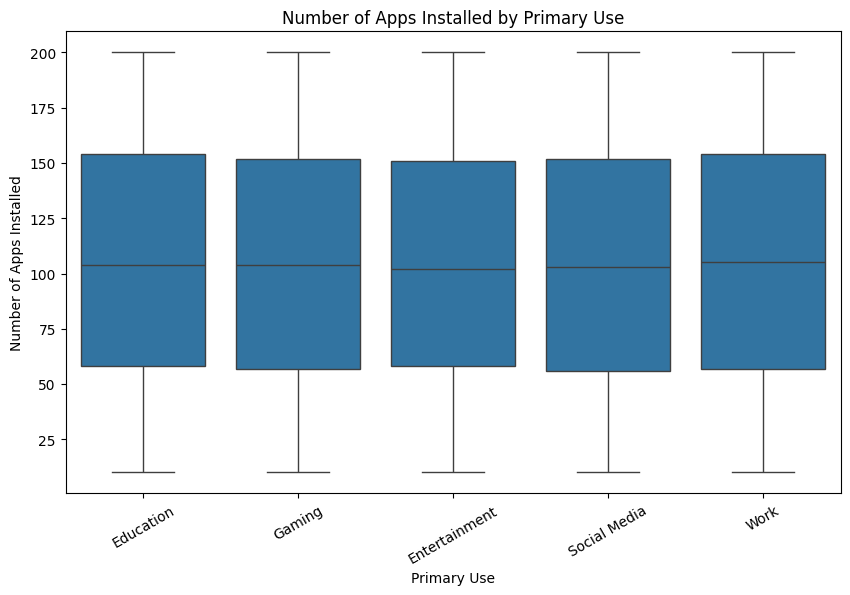

In [24]:
# Distribution of number of Apps installed for each Primary Use

plt.figure(figsize=(10,6))
sns.boxplot(x='Primary Use', y='Number of Apps Installed', data=df)
plt.title('Number of Apps Installed by Primary Use')
plt.xticks(rotation=30)
plt.show()


In [25]:
df.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,60,Other,Delhi,Realme,Android,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,16,Male,Mumbai,Xiaomi,Android,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [ ]:
df.to_csv('cleaned_phone_usage_india.csv', index=False)

In [4]:
import pandas as pd

In [5]:
dF = pd.read_csv('cleaned_phone_usage_india.csv')

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

nominal_data = ['Gender']  # OneHotEncoded
scaling_cols = ['Age', 'Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)', 'Number of Apps Installed', 'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)', 'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']
label_encoding_cols = ['Location', 'Phone Brand', 'OS'] # LabelEncoded

# Define transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_data),
        ('scaler', StandardScaler(), scaling_cols),
        ('label', OrdinalEncoder(), label_encoding_cols)
    ]
)


In [11]:
X = dF.drop('Primary Use', axis='columns')

In [12]:
y = dF["Primary Use"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Define models in dictionary 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Build pipelines for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('Preprocessor', preprocessor),
        ('classifier', model)
    ])

In [10]:
import sklearn
print(sklearn.__version__)


1.7.1



Model: Logistic Regression
 Accuracy: 0.205
precision: 0.208
 Recall: 0.205
 Classification report:
               precision    recall  f1-score   support

           0       0.20      0.18      0.19       925
           1       0.19      0.23      0.21       844
           2       0.21      0.27      0.24       886
           3       0.23      0.11      0.14       899
           4       0.21      0.25      0.22       868

    accuracy                           0.21      4422
   macro avg       0.21      0.21      0.20      4422
weighted avg       0.21      0.21      0.20      4422



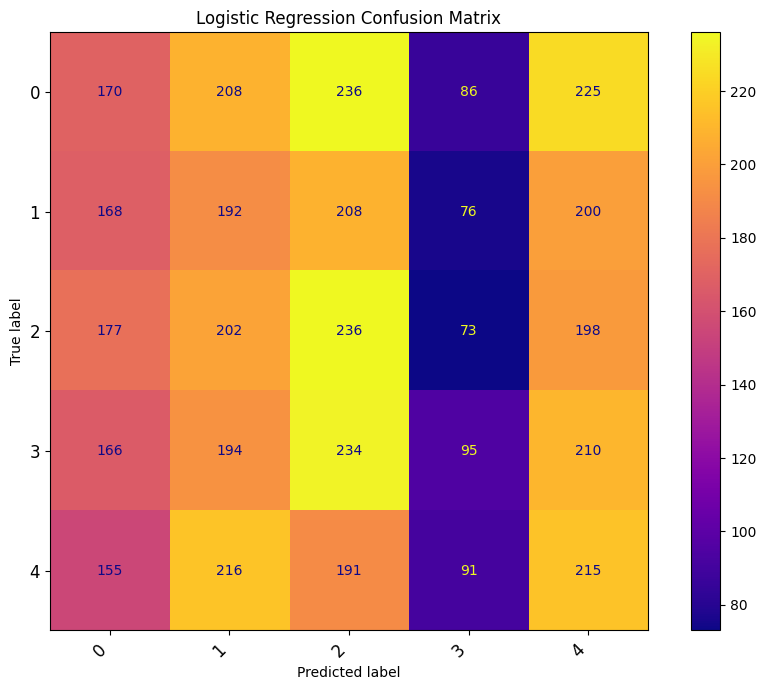

 CV Accuracy mean: 0.201 (std: 0.009)
 CV Precision mean: 0.201 (std: 0.010)
 CV Recall mean: 0.201 (std: 0.009)
-------------------------------------------------------

Model: Decision Tree
 Accuracy: 0.208
precision: 0.207
 Recall: 0.208
 Classification report:
               precision    recall  f1-score   support

           0       0.20      0.19      0.19       925
           1       0.20      0.21      0.21       844
           2       0.22      0.23      0.23       886
           3       0.20      0.19      0.20       899
           4       0.21      0.22      0.22       868

    accuracy                           0.21      4422
   macro avg       0.21      0.21      0.21      4422
weighted avg       0.21      0.21      0.21      4422



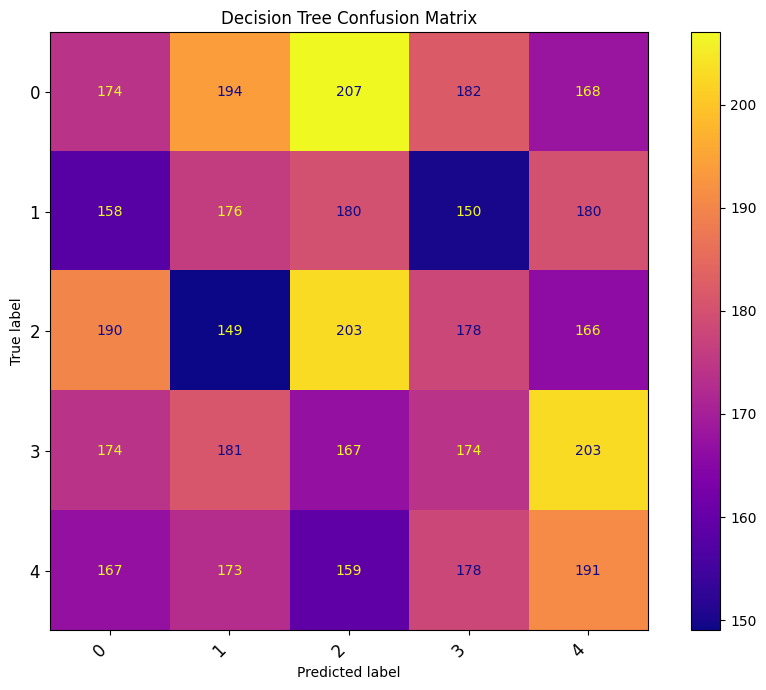

 CV Accuracy mean: 0.202 (std: 0.013)
 CV Precision mean: 0.201 (std: 0.016)
 CV Recall mean: 0.202 (std: 0.014)
-------------------------------------------------------

Model: Random Forest
 Accuracy: 0.200
precision: 0.200
 Recall: 0.200
 Classification report:
               precision    recall  f1-score   support

           0       0.21      0.22      0.21       925
           1       0.20      0.20      0.20       844
           2       0.19      0.20      0.20       886
           3       0.21      0.19      0.20       899
           4       0.19      0.18      0.19       868

    accuracy                           0.20      4422
   macro avg       0.20      0.20      0.20      4422
weighted avg       0.20      0.20      0.20      4422



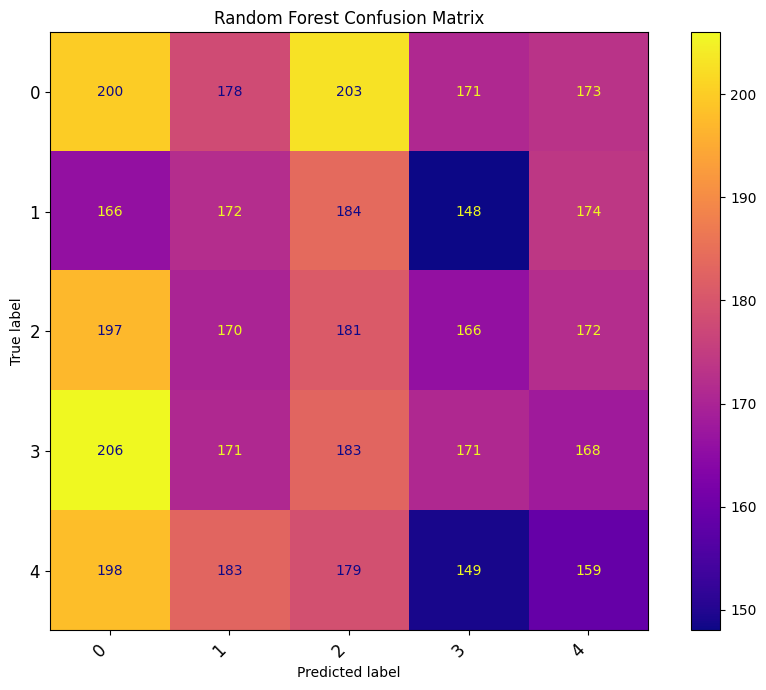

 CV Accuracy mean: 0.202 (std: 0.006)
 CV Precision mean: 0.203 (std: 0.008)
 CV Recall mean: 0.204 (std: 0.005)
-------------------------------------------------------

Model: Gradient Boosting
 Accuracy: 0.195
precision: 0.194
 Recall: 0.195
 Classification report:
               precision    recall  f1-score   support

           0       0.19      0.16      0.18       925
           1       0.19      0.22      0.21       844
           2       0.20      0.22      0.21       886
           3       0.19      0.14      0.16       899
           4       0.20      0.24      0.22       868

    accuracy                           0.20      4422
   macro avg       0.19      0.20      0.19      4422
weighted avg       0.19      0.20      0.19      4422



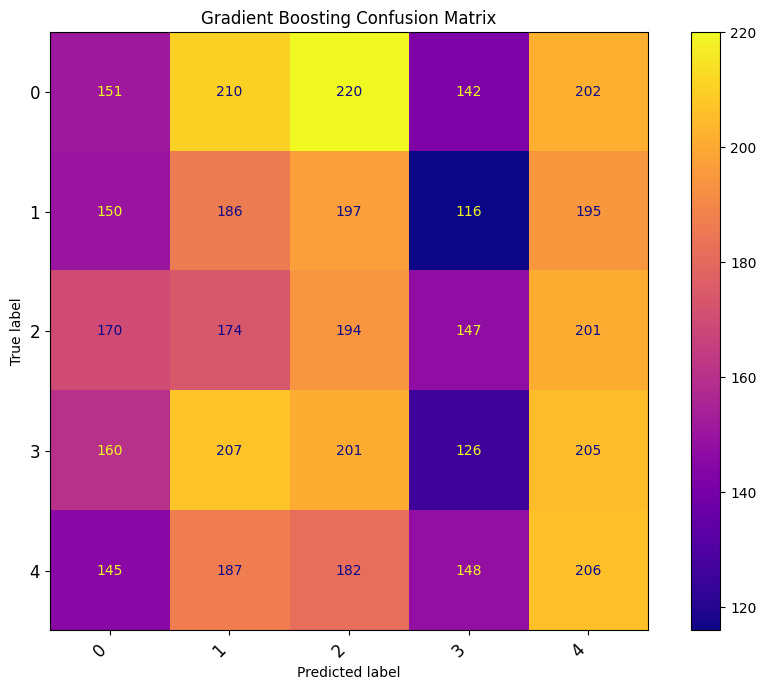

 CV Accuracy mean: 0.204 (std: 0.007)
 CV Precision mean: 0.204 (std: 0.007)
 CV Recall mean: 0.204 (std: 0.007)
-------------------------------------------------------

Model: XGBoost


c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Accuracy: 0.197
precision: 0.197
 Recall: 0.197
 Classification report:
               precision    recall  f1-score   support

           0       0.21      0.20      0.20       925
           1       0.20      0.20      0.20       844
           2       0.21      0.21      0.21       886
           3       0.18      0.18      0.18       899
           4       0.19      0.20      0.20       868

    accuracy                           0.20      4422
   macro avg       0.20      0.20      0.20      4422
weighted avg       0.20      0.20      0.20      4422



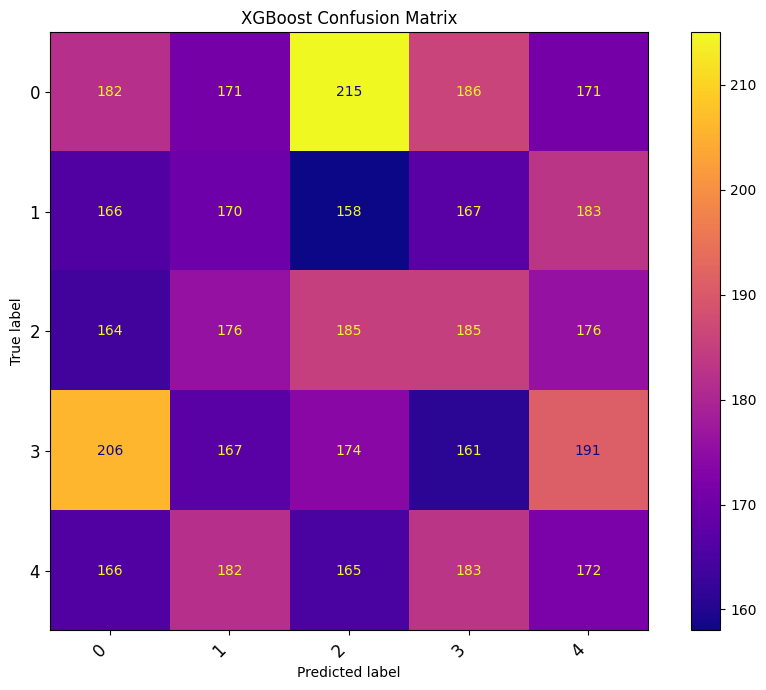

c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:43:44] WARNING: C:\actio

 CV Accuracy mean: 0.199 (std: 0.006)
 CV Precision mean: 0.199 (std: 0.006)
 CV Recall mean: 0.199 (std: 0.006)
-------------------------------------------------------


In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# for multiclass, stratify folds if possible
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, pipeline in pipelines.items():
    print(f"\nModel: {name}")

    
    # fit & predict
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test)

    # Metrics on holdout test set
    acc = accuracy_score(y_test_encoded, y_pred)
    prec = precision_score(y_test_encoded, y_pred, average='weighted')
    rec = recall_score(y_test_encoded, y_pred, average='weighted')
    print(f" Accuracy: {acc:.3f}")
    print(f"precision: {prec:.3f}")
    print(f" Recall: {rec:.3f}")
    print(" Classification report:\n", classification_report(y_test_encoded, y_pred))

    # Confusion matrix plot 
    cm = confusion_matrix(y_test_encoded, y_pred)
    labels = np.unique(y_test_encoded)
    fig, ax = plt.subplots(figsize=(9,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap='plasma')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"{name} Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # Cross-validated metrics (on train data)
    cv_acc = cross_val_score(pipeline, X_train, y_train_encoded, cv=cv, scoring='accuracy')
    cv_prec = cross_val_score(pipeline, X_train, y_train_encoded, cv=cv, scoring='precision_weighted')
    cv_rec = cross_val_score(pipeline, X_train, y_train_encoded, cv=cv, scoring='recall_weighted')
    print(f" CV Accuracy mean: {cv_acc.mean():.3f} (std: {cv_acc.std():.3f})")
    print(f" CV Precision mean: {cv_prec.mean():.3f} (std: {cv_prec.std():.3f})")
    print(f" CV Recall mean: {cv_rec.mean():.3f} (std: {cv_rec.std():.3f})")
    print("-" * 55)

In [16]:
from sklearn.impute import SimpleImputer
import pickle

# Save all model pipelines to one file
with open('classifier_pipelines.pkl', 'wb') as f:
    pickle.dump(pipelines, f)

Logistic regression model has highest accuracy score and F1 score.

In [ ]:
model = pipelines['Logistic Regression']